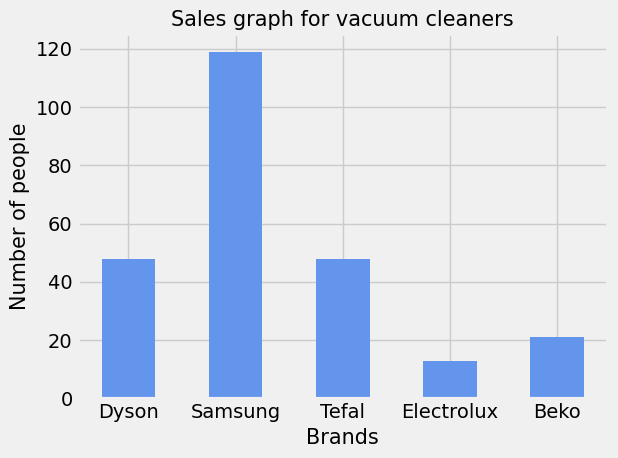

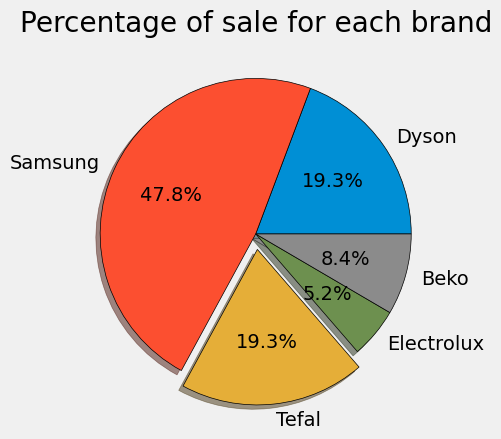

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import statistics

DIR = "../Analysis_Data/"

plt.style.use('fivethirtyeight')

data1 = pd.read_csv(f"{DIR}data_with_specified_in_gender.csv")

brands = list(data1["Marka"].unique())

brands_number_of_people_directory = {
    brand : 0 for brand in brands
}

def filter_number_of_people(brand: str)->int:
    filt = data1["Marka"] == brand
    return data1[filt]["Płeć kupującego"].value_counts().sum()

num_of_people=[filter_number_of_people(brand).astype(int) for brand in brands]

for i in range(len(brands)):
    brands_number_of_people_directory[brands[i]] = num_of_people[i]


x_axis = brands_number_of_people_directory.keys()
y_axis = brands_number_of_people_directory.values()

fig1, ax = plt.subplots()
ax.bar(x_axis, y_axis, color = '#6495ED', width=0.5)
ax.set_title("Sales graph for vacuum cleaners", fontsize=15)
ax.set_xlabel("Brands", fontsize=15)
ax.set_ylabel("Number of people", fontsize=15)
plt.tight_layout()
plt.show()

fig2, ax = plt.subplots()
ax.pie(brands_number_of_people_directory.values(), labels = brands, explode=[0, 0, 0.1, 0, 0], autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True)
ax.set_title("Percentage of sale for each brand")
plt.show()

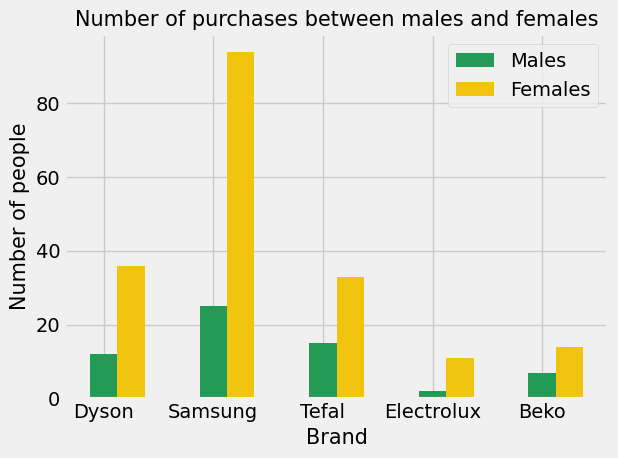

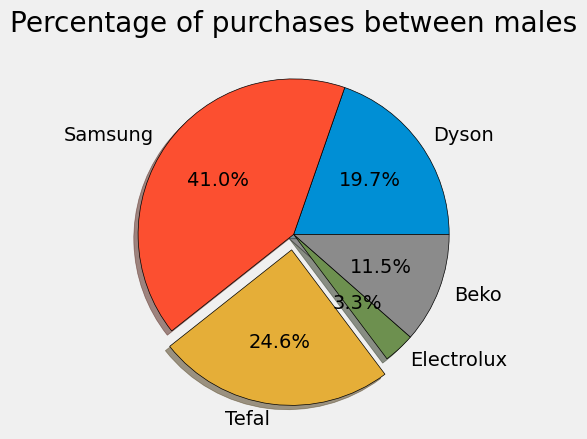

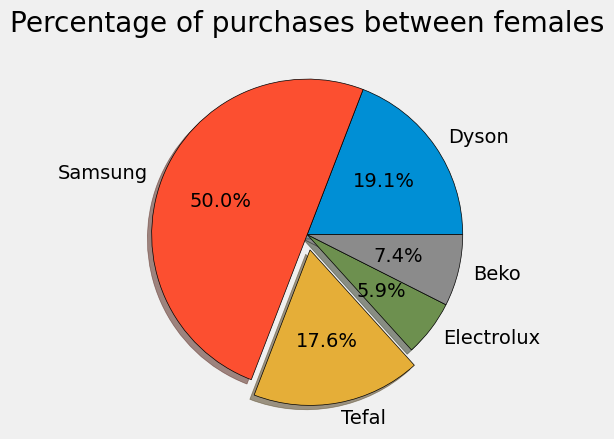

In [2]:
data2 = pd.read_csv(f"{DIR}data_with_specified_in_gender.csv")

brands_based_on_gender = {
    brand : (0, 0) for brand in brands
}

def get_num_of_m_and_k_for_each_brand(brand: str)->int:
    filt = data1["Marka"] == brand
    number_of_males = data1[filt]["Płeć kupującego"].value_counts()['M']
    number_of_females = data1[filt]["Płeć kupującego"].value_counts()['K']
    return (number_of_males, number_of_females)

list_of_males_and_females = [get_num_of_m_and_k_for_each_brand(brand) for brand in brands]

for brand, num_of_males_females in zip(brands, list_of_males_and_females):
    brands_based_on_gender[brand] = num_of_males_females

x_axis = brands_based_on_gender.keys()
y_axis1 = [val[0] for val in brands_based_on_gender.values()]
y_axis2 = [val[1] for val in brands_based_on_gender.values()]

fig2, ax = plt.subplots()
x_indexes = np.arange(len(x_axis))
width = 0.25
ax.bar(x_indexes, y_axis1, width=0.25, color='#239b56', label="Males")
ax.bar(x_indexes+width, y_axis2, width=0.25, color='#f1c40f', label="Females")
plt.xticks(ticks=x_indexes, labels=x_axis)

ax.set_title("Number of purchases between males and females", fontsize=15)
ax.set_ylabel("Number of people", fontsize=15)
ax.set_xlabel("Brand", fontsize=15)
plt.legend()
plt.tight_layout()

plt.show()

fig3, ax = plt.subplots()
ax.pie(y_axis1, labels = brands, explode=[0, 0, 0.1, 0, 0], autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True)
ax.set_title("Percentage of purchases between males")
plt.show()

fig4, ax = plt.subplots()
ax.pie(y_axis2, labels = brands, explode=[0, 0, 0.1, 0, 0], autopct='%1.1f%%', wedgeprops={'edgecolor':'black'}, shadow=True)
ax.set_title("Percentage of purchases between females")
plt.show()

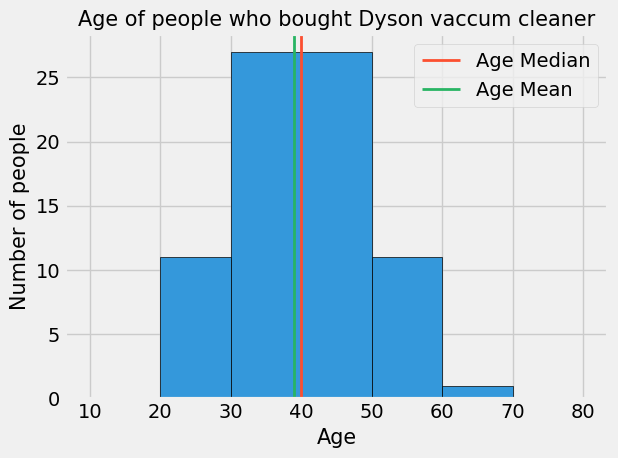

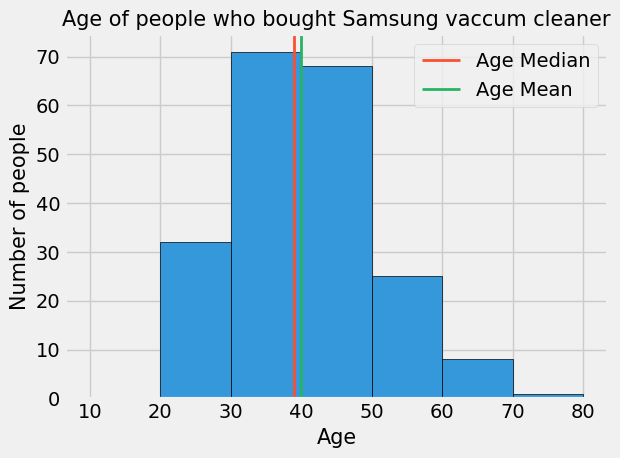

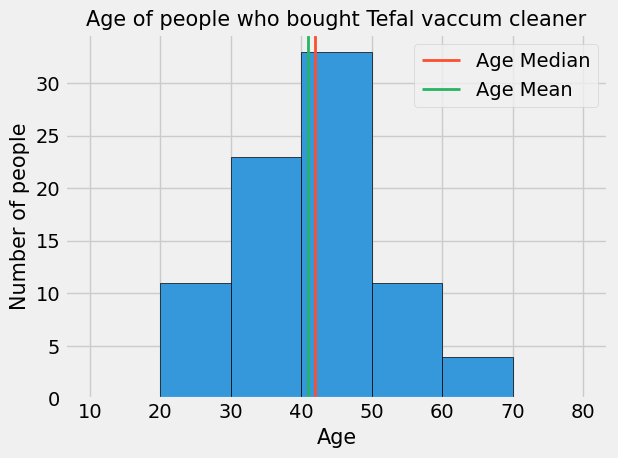

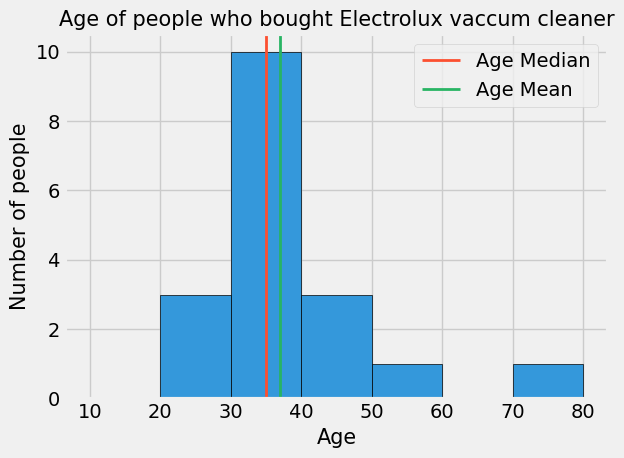

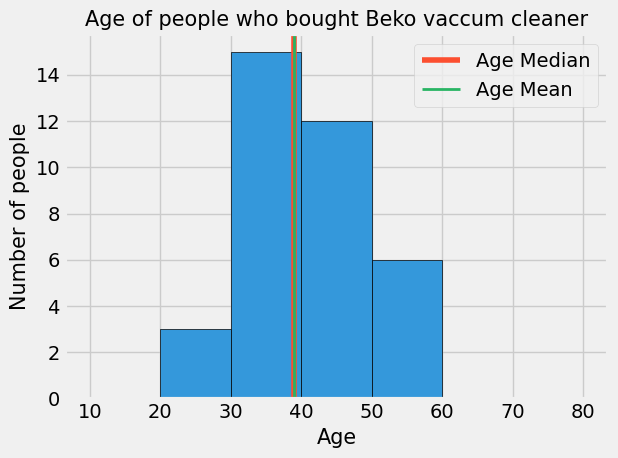

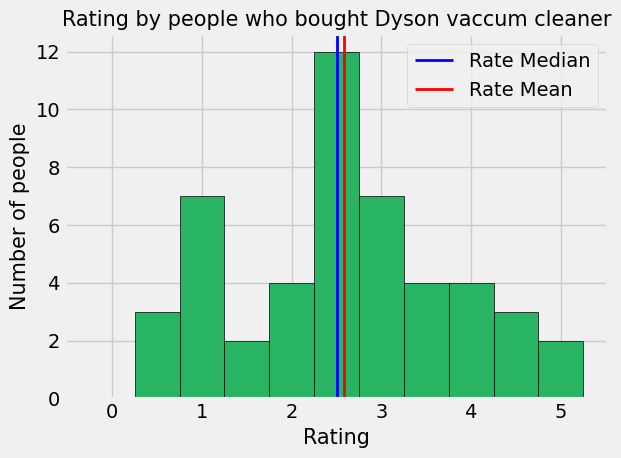

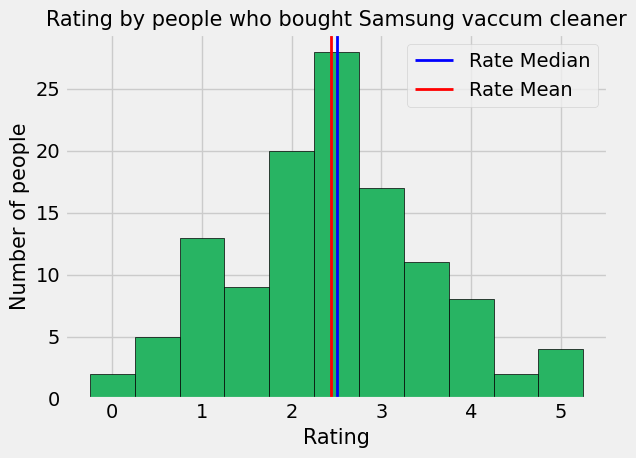

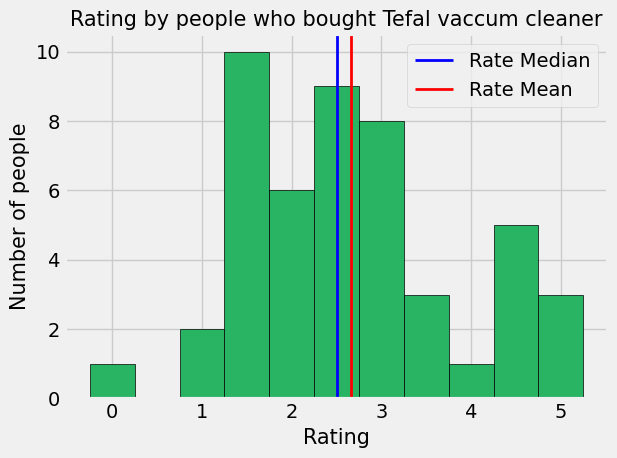

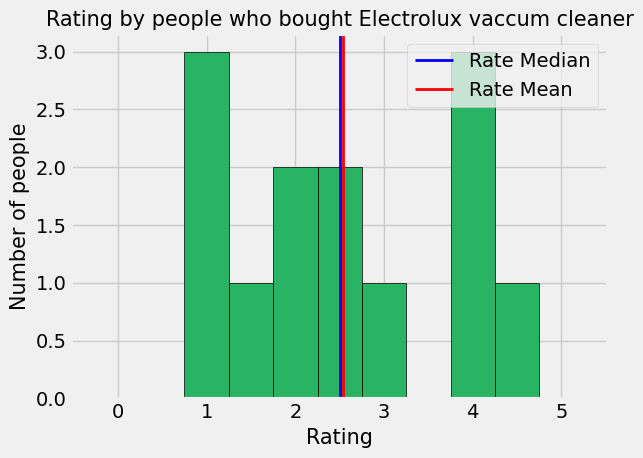

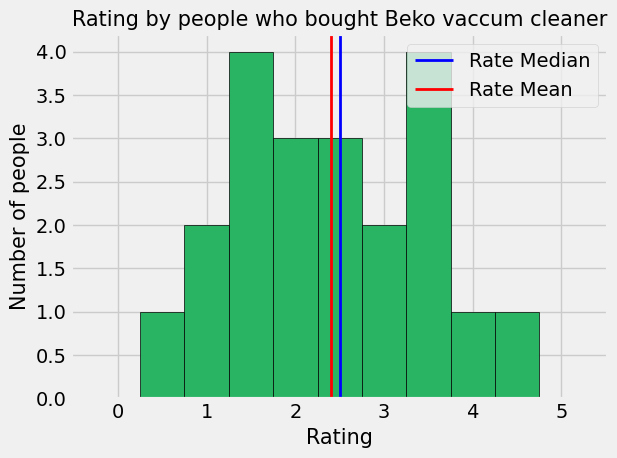

In [8]:
data3 = pd.read_csv(f"{DIR}data_with_proper_age_values.csv")
brand_group = data3.groupby(["Marka"])

for brand in brands:
    median_age = int(brand_group.get_group(brand)["Wiek kupującego"].median())
    mean_age = int(brand_group.get_group(brand)["Wiek kupującego"].mean())
    ages = brand_group.get_group(brand)["Wiek kupującego"]
    fig, ax = plt.subplots()
    bins = [10, 20, 30, 40, 50, 60, 70, 80]
    ax.hist(ages, bins=bins, color="#3498db", edgecolor='black')
    
    if median_age != mean_age:
        ax.axvline(median_age, color='#fc4f30', label='Age Median', linewidth=2)
        ax.axvline(mean_age, color='#28b463', label='Age Mean', linewidth=2)
    else:
        ax.axvline(median_age, color='#fc4f30', label='Age Median', linewidth=4)
        ax.axvline(mean_age, color='#28b463', label='Age Mean', linewidth=2)
    
    ax.set_title(f"Age of people who bought {brand} vaccum cleaner", fontsize=15)
    ax.set_ylabel("Number of people", fontsize=15)
    ax.set_xlabel("Age", fontsize=15)
    plt.legend(loc="upper right")
    plt.tight_layout()

    plt.show()

def filter_number_of_people_rate(rate: int)->int:
    filt = data1["Ocena"] == rate
    return data1[filt]["Płeć kupującego"].value_counts().sum()

def get_num_of_each_rate_for_each_brand(brand: str)->int:
    filt = data1["Marka"] == brand
    number_of_0 = (data1[filt]["Ocena"] == 0).sum()
    number_of_05 = (data1[filt]["Ocena"] == 0.5).sum()
    number_of_1 = (data1[filt]["Ocena"] == 1).sum()
    number_of_15 = (data1[filt]["Ocena"] == 1.5).sum()
    number_of_2 = (data1[filt]["Ocena"] == 2).sum()
    number_of_25 = (data1[filt]["Ocena"] == 2.5).sum()
    number_of_3 = (data1[filt]["Ocena"] == 3).sum()
    number_of_35 = (data1[filt]["Ocena"] == 3.5).sum()
    number_of_4 = (data1[filt]["Ocena"] == 4).sum()
    number_of_45 = (data1[filt]["Ocena"] == 4.5).sum()
    number_of_5 = (data1[filt]["Ocena"] == 5).sum()
    
    return [number_of_0, number_of_05, number_of_1, number_of_15, number_of_2, number_of_25, number_of_3, number_of_35, number_of_4, number_of_45, number_of_5]

rates = list(data1["Ocena"].unique())

rates = sorted(rates)

rates_frequency = [get_num_of_each_rate_for_each_brand(brand) for brand in brands]

brands_based_on_rates = {
    brand : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] for brand in brands
}

for brand, num_of_rates in zip(brands, rates_frequency):
    brands_based_on_rates[brand] = num_of_rates

for brand in brands:
    x_axis = rates
    y_axis = brands_based_on_rates[brand]
    list_for_median = []
    for i in range(len(y_axis)):
        for j in range(y_axis[i]):
            list_for_median.append(x_axis[i])
    median_rate = statistics.median(list_for_median)
    mean_rate = statistics.mean(list_for_median)
    fig, ax = plt.subplots()
    ax.axvline(median_rate, color='blue', label='Rate Median', linewidth=2)
    ax.axvline(mean_rate, color='red', label='Rate Mean', linewidth=2)
    
    ax.bar(x_axis, y_axis, color = '#28b463', edgecolor='black', width=0.5)
    ax.set_title(f"Rating by people who bought {brand} vaccum cleaner", fontsize=15)
    ax.set_xlabel("Rating", fontsize=15)
    ax.set_ylabel("Number of people", fontsize=15)
    plt.legend(loc="upper right")
    plt.tight_layout()
    plt.show()